In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


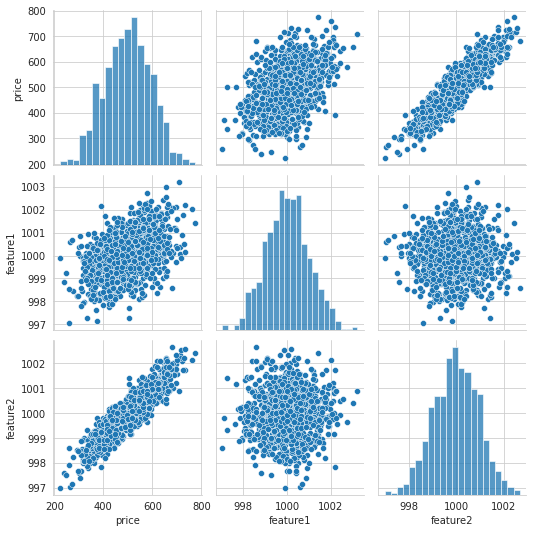

In [6]:
sns.pairplot(df);

In [7]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


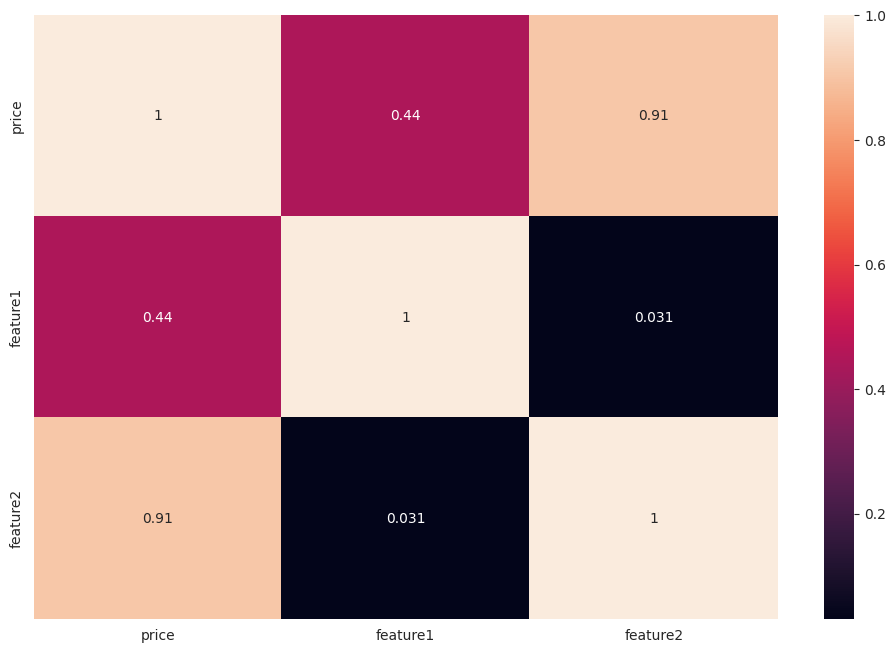

In [12]:
plt.figure(figsize = (12,8) , dpi = 100)

sns.heatmap(df.corr() , annot = True);

# Preprocessing of the Data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df[['feature1', 'feature2']].values  # Important ! We need to transform X and y to the arrays. We do it with .values attribute.
y = df['price'].values

In [19]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [20]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

## Train | Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 53)

## Scaling

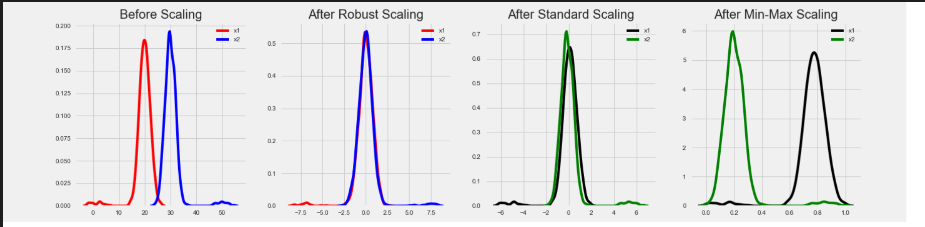

In [22]:
from sklearn.preprocessing import MinMaxScaler # MinMax better at DL most of times.

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled.max()

1.0

In [27]:
X_train_scaled.min()

0.0

In [29]:
X_test_scaled.max() # We compressed the train data between 1 and 0 but test data may be more or less than 1 and 0.

1.0186515935232023

In [30]:
X_test_scaled.min()

0.007155550079659179

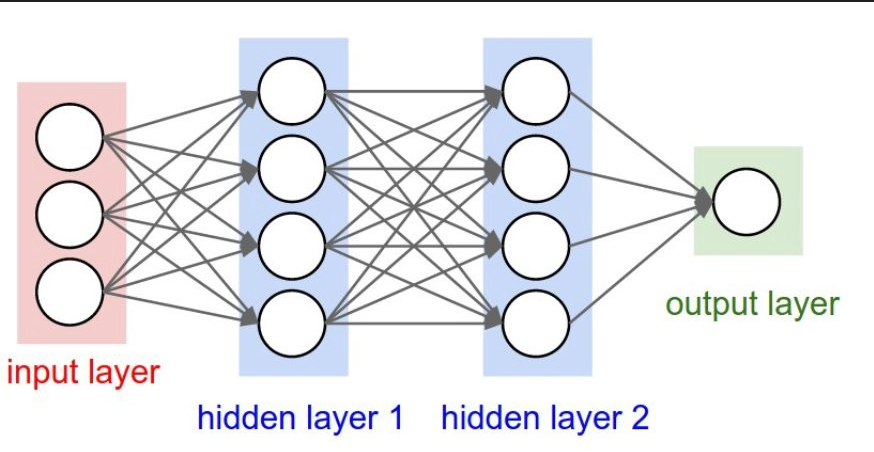

# Modeling

In [31]:
import tensorflow as tf
from keras import models
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential

In [32]:
# Sequential --> We create model with hidden layers via Sequential.
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequentia

In [33]:
# Dense --> Most popular layer type is dense in ANN. 
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every

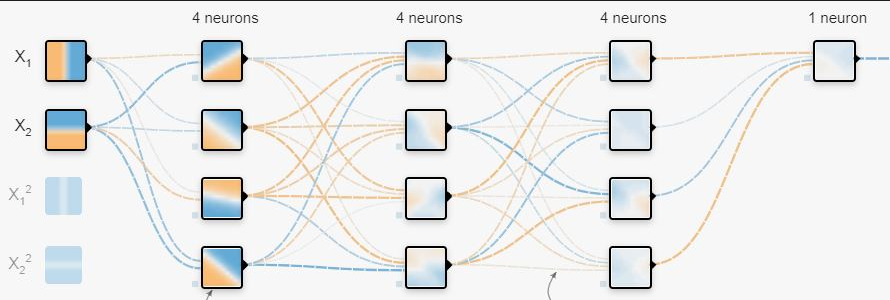

In [ ]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),   # Every dense is define a hidden layer. Units also define how many neurons be in the layer.
                    Dense(units = 4, activation = "relu"),   
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)]) # Our output layer.

In [35]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1)) # Regression problems have only a neuron.

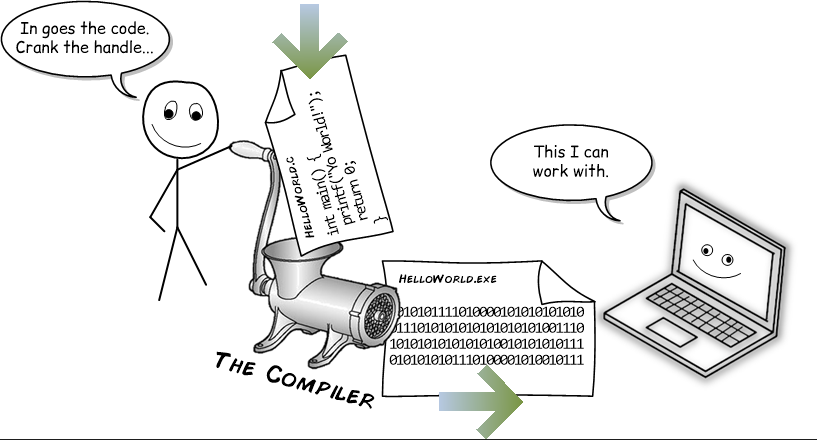

In [36]:
model.compile(optimizer = 'rmsprop' , loss = 'mse') # We compile it last and make the codes understandable by the computer.
# There is two parameter, optimizer and loss. Most popular optimizer's are 'rmsprop' and 'adam'.
# We use mse for regression problems because we can see easily the loss how's changing.
# We choose model how to work with compile...

## Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

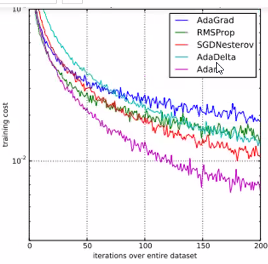

## Model Fitting

In [38]:
model.fit(x = X_train_scaled, y = y_train, batch_size = 32, epochs = 300) 
# 250 defa tüm datayı modele sokacak her iterasyonda 32 satır kullandı (batch_size 32) 32 satırın ortalama hata değerini Gradientdecent ile parametreleri backpropogation ile güncelledi bir somraki epoc bu değerler üzerinden train edilecek bütün epoc lar bitene  kadar devam edecek 
# Loss value belongs to the epoch's last batch.
# For batch_size small is faster but not proper. High is slow but giving more proper results. We can adjust batch_size about our time.

Epoch 1/300
25/25 [==============================] - 3s 2ms/step - loss: 260257.2031
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 260171.6875
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 260081.2812
Epoch 4/300
25/25 [==============================] - 0s 2ms/step - loss: 259974.4844
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 259848.6562
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 259704.1406
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 259537.3438
Epoch 8/300
25/25 [==============================] - 0s 2ms/step - loss: 259334.6250
Epoch 9/300
25/25 [==============================] - 0s 2ms/step - loss: 259086.4375
Epoch 10/300
25/25 [==============================] - 0s 2ms/step - loss: 258794.9219
Epoch 11/300
25/25 [==============================] - 0s 2ms/step - loss: 258463.7812
Epoch 12/300
25/25 [==============================] - 0s 2ms/st

In [39]:
model.summary() # her katmanda kaç parametre olduğunu verir   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 4)                   12        
                                                                 
 dense_1 (Dense)             (32, 4)                   20        
                                                                 
 dense_2 (Dense)             (32, 4)                   20        
                                                                 
 dense_3 (Dense)             (32, 1)                   5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


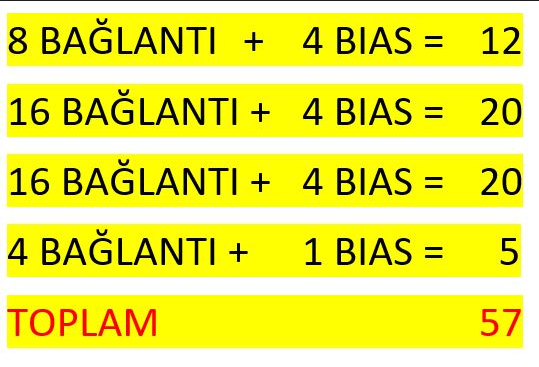

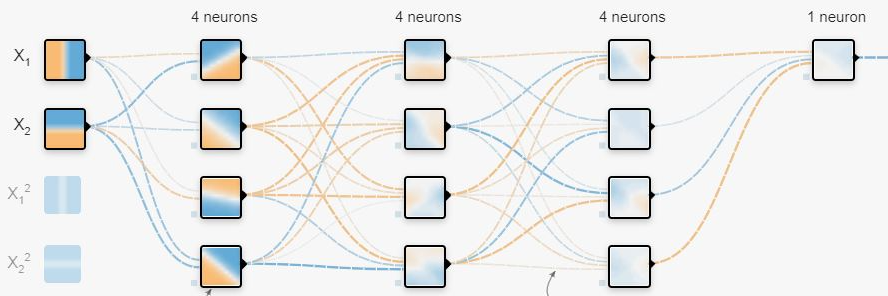

In [40]:
model.weights #eğitim sonrası ağırlık değerleri

[<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 2.4282546 ,  0.2688465 ,  0.95426834,  2.1217043 ],
        [ 2.9247632 , -0.13056277,  4.151218  ,  3.910242  ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.77081126, -0.21010487,  0.71396697,  0.7839912 ], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.15030587,  2.933934  ,  2.679327  ,  0.10909895],
        [-0.29394385, -0.3642996 , -0.50102836, -0.3814076 ],
        [-0.28691718,  2.90477   ,  2.7713902 ,  0.35614   ],
        [ 0.04190379,  3.3166165 ,  2.001964  , -0.42467836]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=array([-0.03196304,  0.76974064,  0.6444335 , -0.12859803], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.76512295, -0.779209  ,  0.7887718 ,  0.8461533 ],
        [ 0.00898625,  2.8392725 , -

In [41]:
model.history.history # model eğitilirken çıkan loss değerlerini verir

{'loss': [260257.203125,
  260171.6875,
  260081.28125,
  259974.484375,
  259848.65625,
  259704.140625,
  259537.34375,
  259334.625,
  259086.4375,
  258794.921875,
  258463.78125,
  258093.9375,
  257679.65625,
  257219.984375,
  256709.5,
  256142.765625,
  255522.578125,
  254838.140625,
  254088.765625,
  253270.59375,
  252378.578125,
  251408.40625,
  250359.421875,
  249230.984375,
  248008.421875,
  246694.734375,
  245281.9375,
  243769.90625,
  242146.859375,
  240427.640625,
  238590.0,
  236633.90625,
  234558.953125,
  232358.359375,
  230036.015625,
  227579.21875,
  224988.0625,
  222256.421875,
  219394.84375,
  216391.515625,
  213223.34375,
  209926.78125,
  206471.40625,
  202857.765625,
  199092.125,
  195181.515625,
  191120.046875,
  186901.921875,
  182541.8125,
  178005.78125,
  173323.15625,
  168515.0,
  163553.765625,
  158467.1875,
  153230.953125,
  147843.5,
  142323.1875,
  136717.203125,
  131017.4765625,
  125208.2890625,
  119273.09375,
  113288.117

In [42]:
pd.DataFrame(model.history.history)

,loss
0,260257.203
1,260171.688
2,260081.281
3,259974.484
4,259848.656
...,...
295,24.515
296,24.576
297,24.708
298,24.599


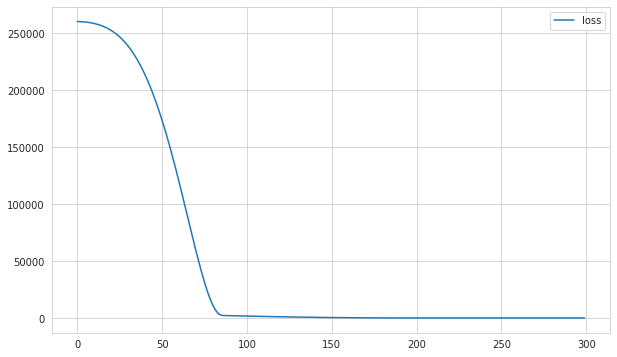

In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

(0.0, 3000.0)

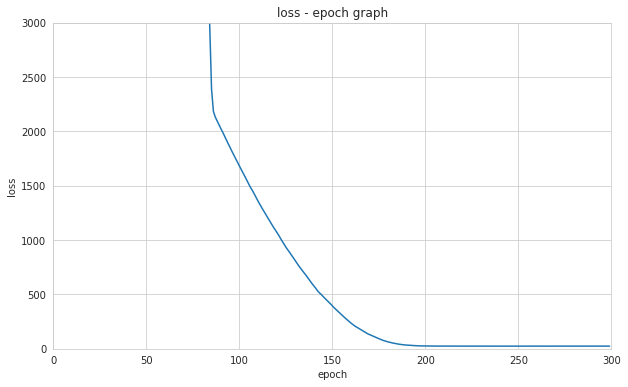

In [48]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 300]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

# Model Performance

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [50]:
model.evaluate(X_train_scaled, y_train, verbose=0) # It gives the result of whatever score I gave to the loss while creating the model. "mse"

24.482318878173828

In [51]:
model.evaluate(X_test_scaled, y_test, verbose=0) # predict x and y tests in the background and then evaluate

24.575563430786133

In [52]:
y_pred = model.predict(X_test_scaled)

7/7 [==============================] - 0s 2ms/step


In [53]:
r2_score(y_test , y_pred) 

0.9973176281494822

In [54]:
explained_variance_score(y_test, y_pred)  # All the time almost same with r2.

0.9973860614377967

In [55]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}

compare = pd.DataFrame(my_dict)
compare.sample(10)

# Lets compare Actual and pred values.
# DL working good with big data.

,Actual,Pred
12,541.129,541.331
155,552.915,545.954
166,497.821,489.850
13,451.804,447.200
170,392.047,393.766
9,439.090,432.410
117,610.455,598.313
179,679.895,678.985
160,525.556,518.727
61,514.895,516.839


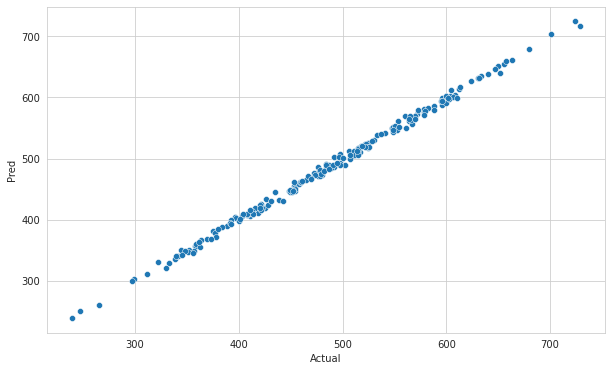

In [56]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare);

In [57]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)
  
# Good eval_metric for regression.

In [58]:
eval_metric(y_test, y_pred)

r2_score: 0.9973176281494822 
mae: 3.9412485369735855 
mse: 24.575572457282604 
rmse: 4.957375561452108


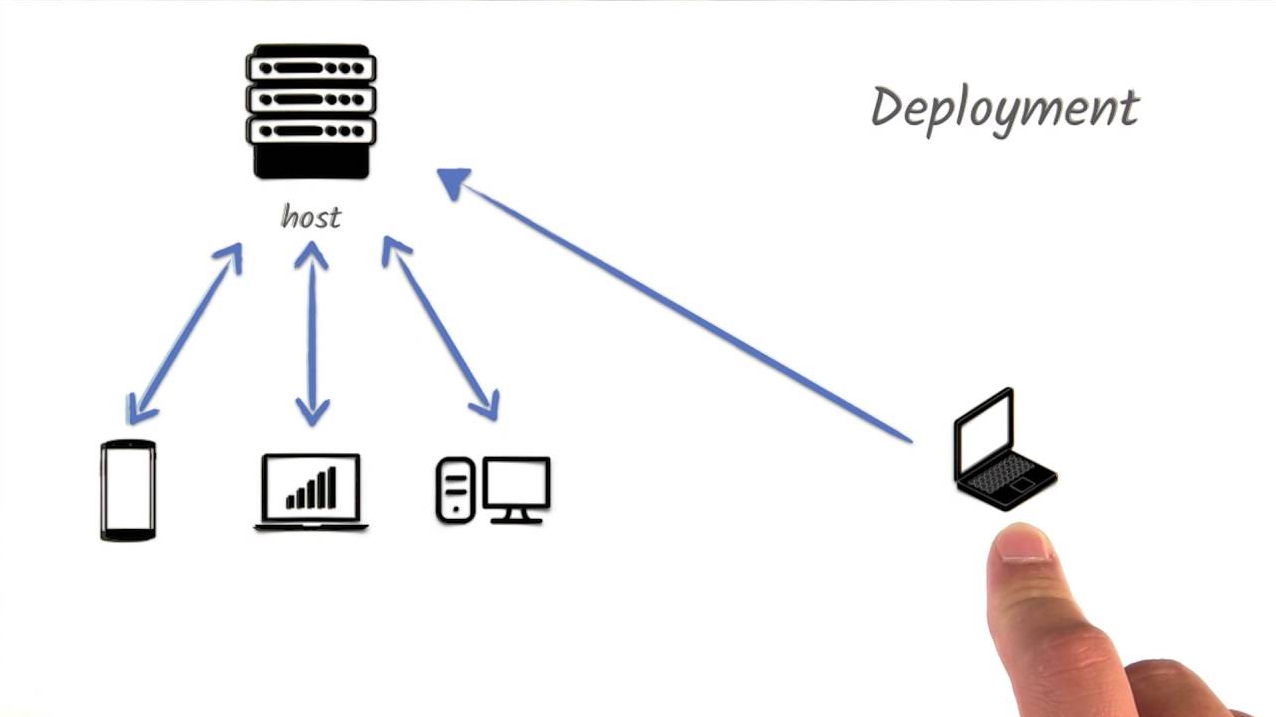

# Final Model and Model Deployment

In [59]:
scaler = MinMaxScaler().fit(X)

In [60]:
import joblib
joblib.dump(scaler , 'scaler.joblib')

['scaler.joblib']

In [61]:
X_scaled = scaler.transform(X)

In [62]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 300)

Epoch 1/300
32/32 [==============================] - 1s 3ms/step - loss: 257408.3438
Epoch 2/300
32/32 [==============================] - 0s 3ms/step - loss: 257317.5781
Epoch 3/300
32/32 [==============================] - 0s 3ms/step - loss: 257206.0312
Epoch 4/300
32/32 [==============================] - 0s 3ms/step - loss: 257063.0312
Epoch 5/300
32/32 [==============================] - 0s 3ms/step - loss: 256877.7969
Epoch 6/300
32/32 [==============================] - 0s 3ms/step - loss: 256639.8906
Epoch 7/300
32/32 [==============================] - 0s 3ms/step - loss: 256337.3750
Epoch 8/300
32/32 [==============================] - 0s 3ms/step - loss: 255957.2969
Epoch 9/300
32/32 [==============================] - 0s 3ms/step - loss: 255483.4688
Epoch 10/300
32/32 [==============================] - 0s 3ms/step - loss: 254905.4531
Epoch 11/300
32/32 [==============================] - 0s 3ms/step - loss: 254212.0000
Epoch 12/300
32/32 [==============================] - 0s 3ms/st

In [63]:
final_model.save('model_fake.h5')  # creates a HDF5 file 'my_model.h5'

## Prediction-1

In [64]:
from tensorflow.keras.models import load_model # We load our model.

In [65]:
model_fake_reg = load_model('model_fake.h5')

In [66]:
scaler_fake_reg = joblib.load(filename='scaler.joblib')

In [67]:
sample = [[998, 1000]]

In [68]:
sample_scaled = scaler_fake_reg.transform(sample)

In [69]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 56ms/step


array([[419.96127]], dtype=float32)

## Prediction-2

In [70]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],  # We can predict more than one sample.
           "Feature2": [1000, 999, 998, 997, 996]}   

In [71]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [72]:
sample_scaled = scaler_fake_reg.transform(sample) # Scale already changing to array so we don't need to change again.
sample_scaled

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [73]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 15ms/step


array([[379.78833],
       [331.43063],
       [283.07294],
       [234.71526],
       [186.35759]], dtype=float32)

In [ ]:
# Done